In [1]:
!pip install geopandas

     |████████████████████████████████| 994 kB 25.3 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 27.2 MB/s 


In [2]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 53.2 MB/s 


In [3]:
!pip install geovoronoi

     |████████████████████████████████| 27.4 MB 99 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import numpy as np
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
from scipy.spatial import Voronoi, voronoi_plot_2d

In [5]:
dados = pd.read_csv("/content/postos_itap - postos_itap.csv")
dados.shape

(13, 4)

In [6]:
dados.head()

,Unnamed: 0,LATITUDE,LONGITUDE,NOME
0,317,-23.760580,-46.814820,USF CRISPIM
1,1015,-23.684961,-46.826672,USF BRANCA FLOR
2,1165,-23.747577,-46.900990,USF POTUVERA
3,1314,-23.716320,-46.817250,USF SAO PEDRO
4,1524,-23.694630,-46.801610,USF VALO VELHO


In [7]:
colunas = ['LATITUDE', 'LONGITUDE', 'NOME']
postos = dados[colunas]
postos.shape

(13, 3)

In [8]:
postos['LATITUDE'] = postos['LATITUDE'].astype(str)
postos['LATITUDE'] = postos['LATITUDE'].str.replace(",", ".")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
postos['LONGITUDE'] = postos['LONGITUDE'].astype(str)
postos['LONGITUDE'] = postos['LONGITUDE'].str.replace(",", ".")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
postos['LONGITUDE'] = postos['LONGITUDE'].astype(float)
postos['LATITUDE'] = postos['LATITUDE'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
postos

,LATITUDE,LONGITUDE,NOME
0,-23.760580,-46.814820,USF CRISPIM
1,-23.684961,-46.826672,USF BRANCA FLOR
2,-23.747577,-46.900990,USF POTUVERA
3,-23.716320,-46.817250,USF SAO PEDRO
4,-23.694630,-46.801610,USF VALO VELHO
5,-23.709170,-46.850760,UBS SALVADOR DE LEONE
6,-23.741920,-46.800990,USF MOMBACA
7,-23.745220,-46.802180,UBS JARDIM JACIRA
8,-23.739310,-46.797060,USF ANALANDIA
9,-23.748740,-46.781970,USF HORIZONTE AZUL


In [13]:
postos_pandas = gpd.GeoDataFrame(postos, geometry=gpd.points_from_xy(postos['LATITUDE'], postos['LONGITUDE']))

In [14]:
postos_pandas.head()

,LATITUDE,LONGITUDE,NOME,geometry
0,-23.760580,-46.814820,USF CRISPIM,POINT (-23.76058 -46.81482)
1,-23.684961,-46.826672,USF BRANCA FLOR,POINT (-23.68496 -46.82667)
2,-23.747577,-46.900990,USF POTUVERA,POINT (-23.74758 -46.90099)
3,-23.716320,-46.817250,USF SAO PEDRO,POINT (-23.71632 -46.81725)
4,-23.694630,-46.801610,USF VALO VELHO,POINT (-23.69463 -46.80161)


In [15]:
print(type(postos_pandas))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [16]:
postos_pandas.crs = "EPSG:4326"

In [17]:
postos_itap = gpd.read_file("/content/polygons7.shp")

In [18]:
postos_itap

,ZID,NAME,ELEV,ICON,geometry
0,0,Poligono,0.0,81,"POLYGON ((-46.90345 -23.75860, -46.81899 -23.7..."


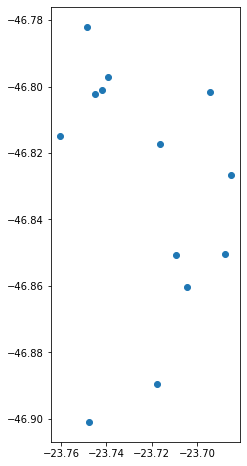

In [28]:
postos_pandas.plot(figsize=(20,8))
plt.show()

In [31]:
coolunas = ['LATITUDE', 'LONGITUDE']
diagrama = postos_pandas[coolunas]

In [32]:
vor = Voronoi(diagrama)

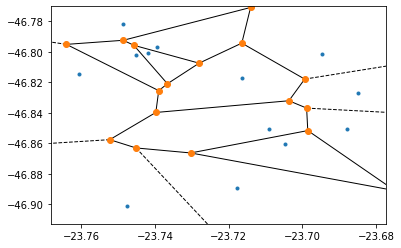

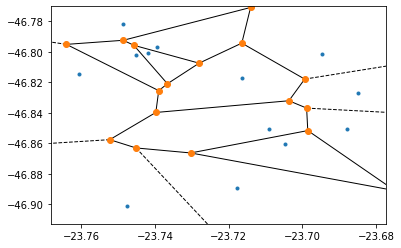

In [33]:
voronoi_plot_2d(vor)

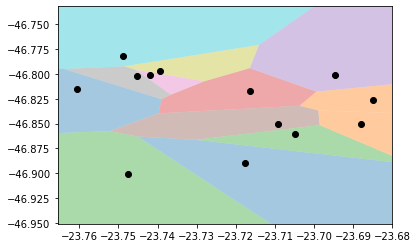

In [81]:
def voronoi_finite_polygons_2d(vor, radius=None):
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

vor = Voronoi(diagrama)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(diagrama['LATITUDE'], diagrama['LONGITUDE'], 'ko')
plt.xlim(vor.min_bound[0] - 0.005, vor.max_bound[0] + 0.005)
plt.ylim(vor.min_bound[1] - 0.05, vor.max_bound[1] + 0.05)

plt.show()

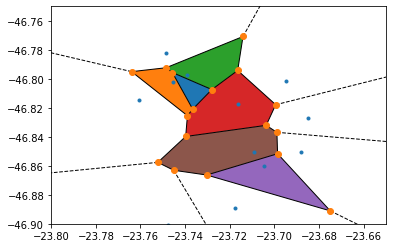

In [73]:
vor = Voronoi(diagrama)
voronoi_plot_2d(vor)

for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

plt.xlim([-23.8, -23.65])

plt.show()